In [33]:
from alpha_vantage.foreignexchange import ForeignExchange
import matplotlib.pyplot as plt
cc = ForeignExchange(key='OGRPFV5D58LC77OL',output_format='pandas')
import pandas as pd
from datetime import datetime
import numpy as np
from numpy.polynomial.polynomial import polyfit

if dfm.empty:
    dfm, meta_data = cc.get_currency_exchange_monthly(from_symbol='EUR',to_symbol='USD', outputsize='full')

if dfw.empty:
    dfw, meta_data = cc.get_currency_exchange_weekly(from_symbol='EUR',to_symbol='USD', outputsize='full')  
    
if dfd.empty:
   dfd, meta_data = cc.get_currency_exchange_daily(from_symbol='EUR',to_symbol='USD', outputsize='full')


df60, meta_data = cc.get_currency_exchange_intraday(from_symbol='EUR',to_symbol='USD',interval='60min', outputsize='full')

In [34]:
def clean_Columns(df):
    if 'errorslope' not in df.columns:
        df.reset_index(inplace=True) #reset index to get timestamp out
        df.columns = ['date','open','high','low','close'] #Make sure column names are legit  
        df['index'] = np.arange(len(df)) #create an index 
        df['errorslope']=np.nan
        df['errorslopediff']=np.nan
    return df

#Cleanup columns
clean_Columns(dfm)
clean_Columns(dfw)
clean_Columns(dfd)

#Make copis to work off keeping the originals true
dfm_copy = dfm.copy()
dfw_copy = dfw.copy()
dfd_copy = dfd.copy()


df60.reset_index(inplace=True) #reset index to get timestamp out
df60.columns = ['timestamp','open','high','low','close'] #Make sure column names are legit    

df60 = df60[df60.timestamp.dt.weekday < 5] #Filter out all weekend data
df60['index'] = np.arange(len(df60)) #create an index 
df60['errorslope']=np.nan
df60['errorslopediff']=np.nan

ValueError: cannot insert level_0, already exists

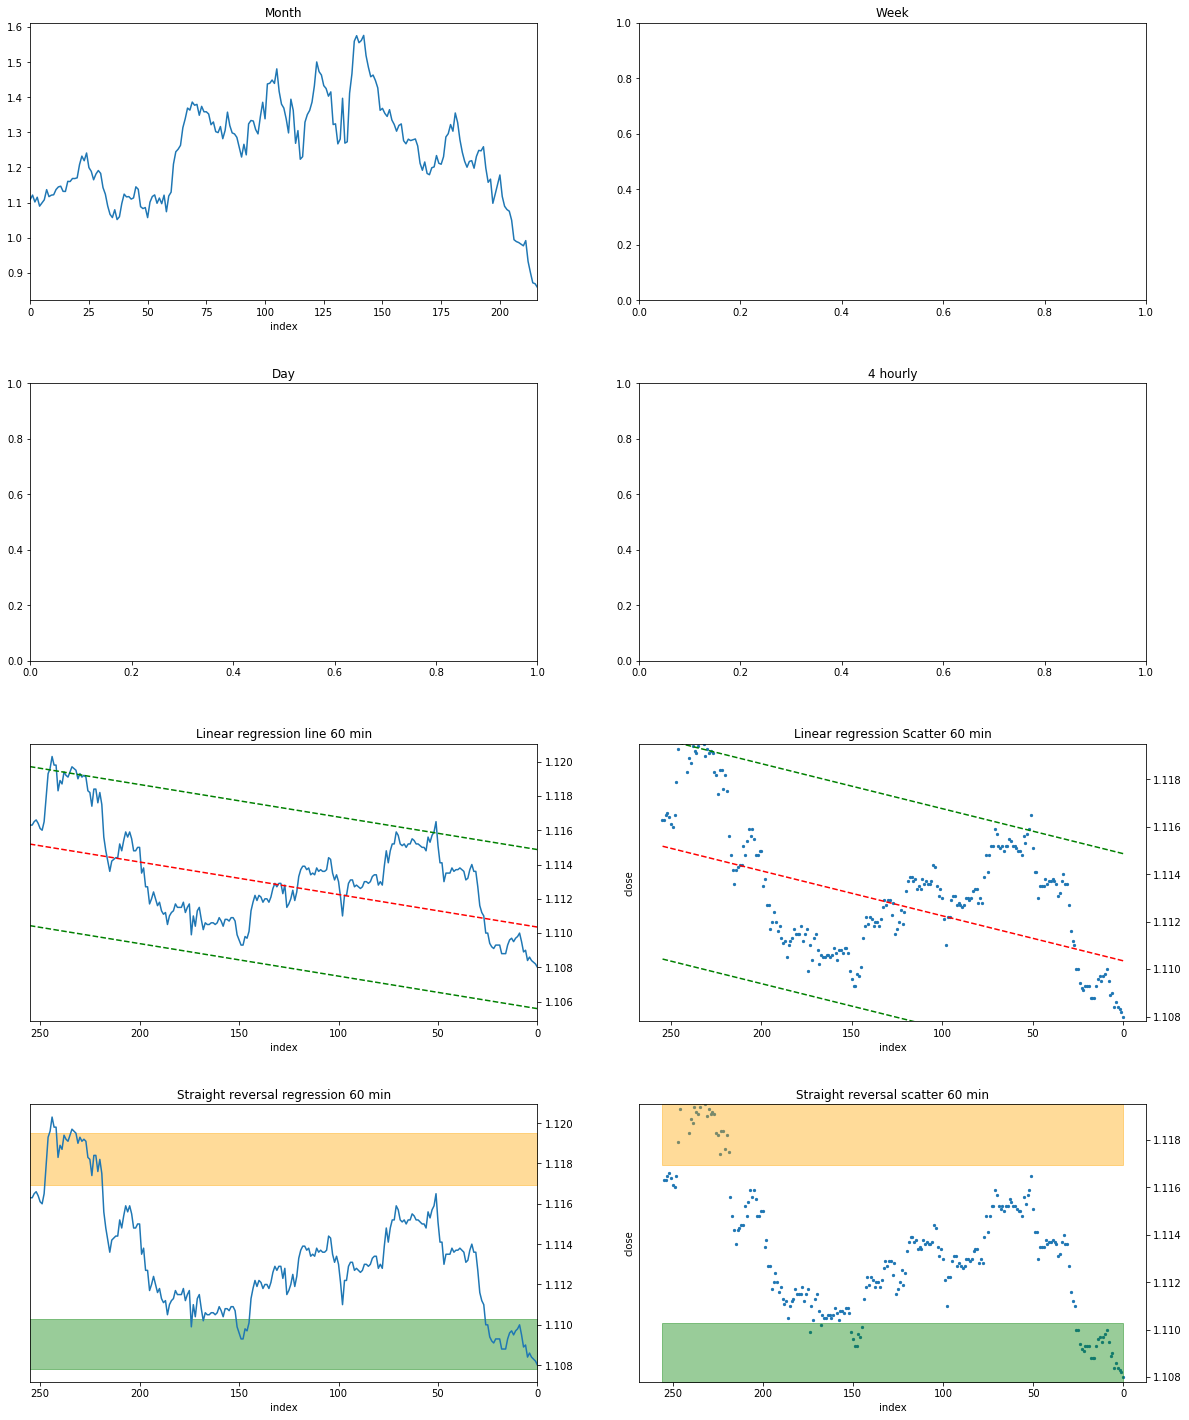

In [31]:
_val = 'low'
#_monthsback = 

def Set_Ylim(df,ax):
    ax.set_ylim([df[_val].min(),df[_val].max()])

def Plot_HiLowBars(df,ax):
    ax.fill_between([0,df['index'].count()],df[_low].quantile(0.2), df[_low].min(),alpha=0.4,color='green')
    ax.fill_between([0,df['index'].count()],df[_low].max(),df[_low].quantile(0.9),alpha=0.4,color='orange')
    ax.yaxis.tick_right()
    ax.invert_xaxis()

def Plot_errorLine(df,ax):
    b, m = polyfit(df['index'], df[_low], 1)
    ax.plot(df['index'], b + m * df['index'], 'r--')
    ax.yaxis.tick_right()
    ax.invert_xaxis()
    for index, row in df.iterrows(): #Calculate the difference between the regression line and high/low
      df.errorslope = b + m * df['index']
      df.errorslopediff = df[_val] - df.errorslope
    #Calculate min and max difference and plot new slops at these extremes
    maxdiff = df.errorslopediff.max()
    mindiff = df.errorslopediff.min()
    ax.plot(df['index'], maxdiff + (b + m * df['index']), 'g--')
    ax.plot(df['index'], mindiff + (b + m * df['index']), 'g--')

    
    
#Set the main figure proportions
fig = plt.figure(figsize=(20,25))
fig.subplots_adjust(hspace=0.3)

# Divide the figure into a 2x2 grid, and set sections to ax1 and ax2
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)


#Plot the eight graphs
dfm_copy.plot(x='index', y='close', ax=ax1, legend=False)
dfw_copy.plot(x='index', y='close', ax=ax2, legend=False)
dfd_copy.plot(x='index', y='close', ax=ax3, legend=False)
df60.plot(x='index', y='close', ax=ax5, legend=False)
df60.plot(x='index', y='close', ax=ax6, kind = 'scatter', marker='.')
df60.plot(x='index', y='close', ax=ax7, legend=False)
df60.plot(x='index', y='close', ax=ax8, kind = 'scatter',marker='.')

#ax1.yaxis.set_label_text("Month")
ax1.set_title("Month")
ax2.set_title("Week")
ax3.set_title("Day")
ax4.set_title("4 hourly")
ax5.set_title('Linear regression line 60 min')
ax6.set_title('Linear regression Scatter 60 min')
ax7.set_title('Straight reversal regression 60 min')
ax8.set_title('Straight reversal scatter 60 min')

Set_Ylim(df60,ax6)
Set_Ylim(df60,ax8)

Plot_errorLine(df60,ax5)
Plot_errorLine(df60,ax6)

Plot_HiLowBars(df60,ax7)
Plot_HiLowBars(df60,ax8)



In [108]:
#df = df60.copy()
#df60[df60.timestamp > '2020-01-12 18:00:00']
#df[df['timestamp'].isin(['2020-01-13','2020-01-07'])]
#df.mean()
#pieces = [df[:1], df[:3], df[4:]] # Chop a datraframe into pieces
#df['day'] = df['timestamp'].dt.day_name() #Create a column of day names
#df.groupby('day')
#df.set_index('day', inplace=True)
#pd.set_option('display.max_rows', 500)
gf = df.copy()

In [2]:
#gf.set_index(['day','Date','time'], inplace=True)

In [ ]:
gf = gf.groupby(['day','Date','time']).sum()

In [ ]:
gf.to_csv('filtered.csv')

In [ ]:
gf.dtypes

In [ ]:
# extracting date from timestamp
gf['Date'] = gf['timestamp'].dt.date
gf['time'] = gf['timestamp'].dt.time


In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
stacked = gf.stack()

In [10]:
#stacked.tail(50)
#gf = df.copy()
#gf['timestamp'].resample('2H').mean()
print(dfm.columns)
print(dfw.columns)
print(dfd.columns)

Index(['1. open', '2. high', '3. low', '4. close'], dtype='object')
Index(['1. open', '2. high', '3. low', '4. close'], dtype='object')
Index(['1. open', '2. high', '3. low', '4. close'], dtype='object')


In [18]:
dfw

date    open    high     low   close  index  errorslope  \
0   2020-01-20  1.1095  1.1102  1.1078  1.1083      0         NaN   
1   2020-01-19  1.1117  1.1173  1.1084  1.1090      1         NaN   
2   2020-01-12  1.1160  1.1205  1.1084  1.1117      2         NaN   
3   2020-01-05  1.1179  1.1239  1.1123  1.1159      3         NaN   
4   2019-12-29  1.1078  1.1188  1.1068  1.1178      4         NaN   
..         ...     ...     ...     ...     ...    ...         ...   
937 2002-02-01  0.8630  0.8674  0.8560  0.8614    937         NaN   
938 2002-01-25  0.8836  0.8890  0.8628  0.8647    938         NaN   
939 2002-01-18  0.8933  0.8953  0.8790  0.8843    939         NaN   
940 2002-01-11  0.8956  0.8999  0.8862  0.8921    940         NaN   
941 2002-01-04  0.8850  0.9066  0.8822  0.8951    941         NaN   

     errorslopediff  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
..              ...  
937             NaN  
938             NaN  
939             NaN  
940             NaN  
941             NaN  

[942 rows x 8 columns]